/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_4840/1110827242.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['visits'].fillna(method='ffill', inplace=True)
/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_4840/1110827242.py:31: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['visits'].fillna(method='ffill', inplace=True)
/var/folders/vv/89zs5c496pdd8ktzhzpzpd240000gn/T/ipykernel_4840/1110827242.py:32: Futur

<Figure size 1200x600 with 0 Axes>

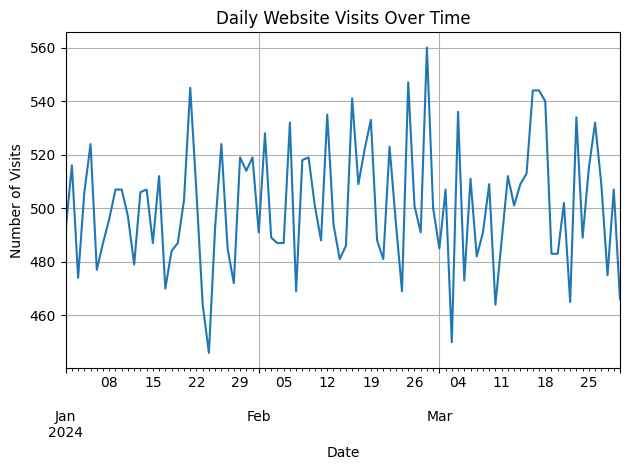

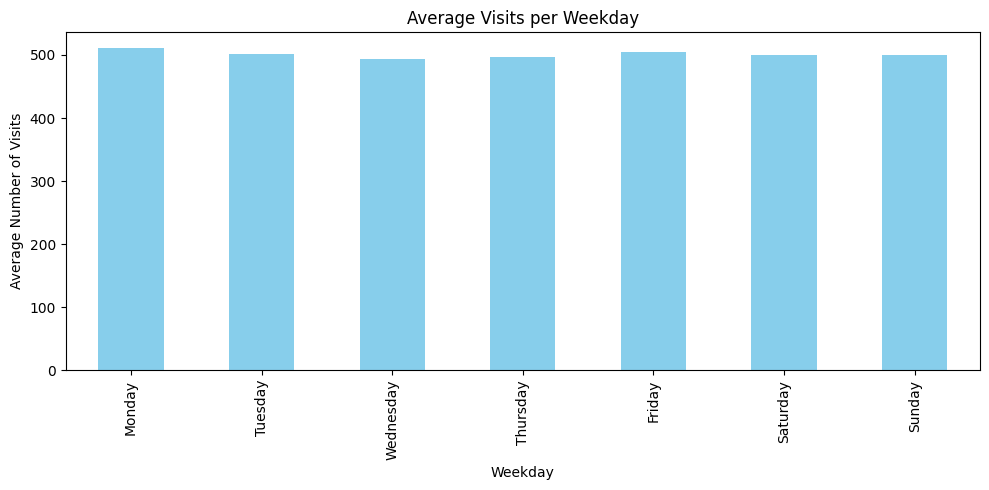

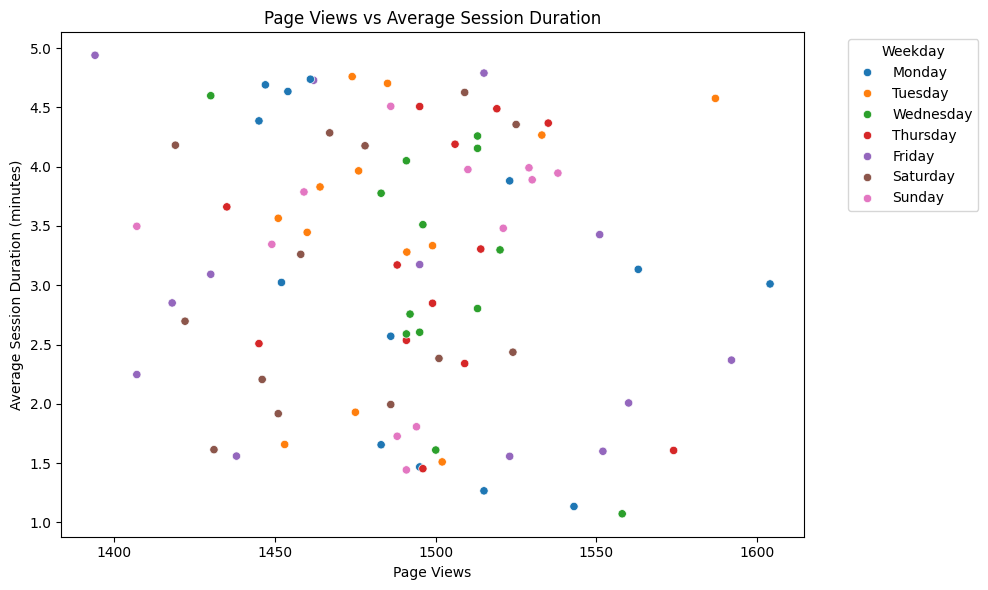

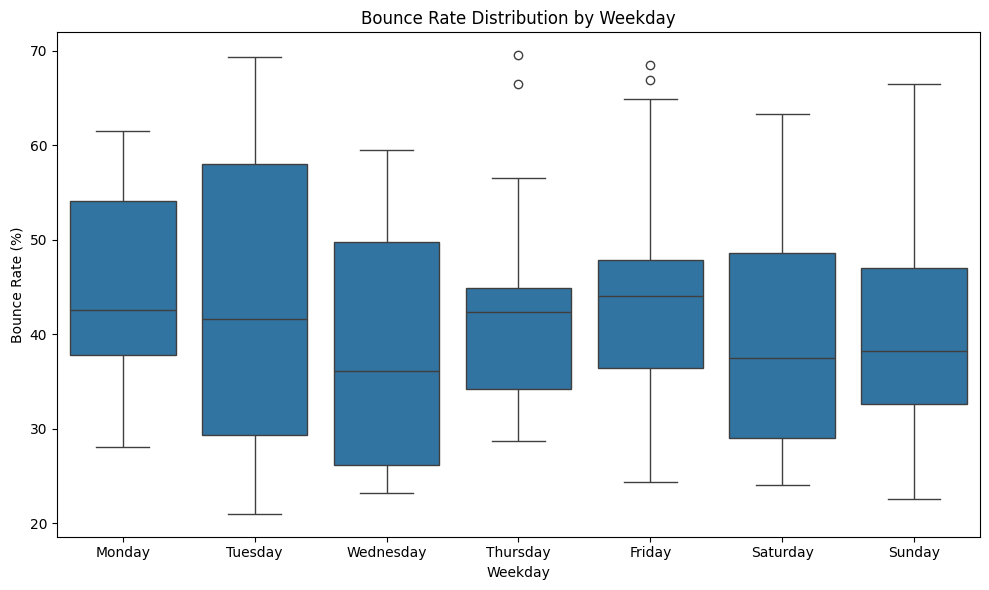

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



dates = pd.date_range(start='2024-01-01', periods=90, freq='D')

np.random.seed(42)
data = {
    'date': dates,
    'visits': np.random.poisson(lam=500, size=90),
    'unique_visitors': np.random.poisson(lam=300, size=90),
    'page_views': np.random.poisson(lam=1500, size=90),
    'bounce_rate': np.random.uniform(20, 70, size=90), 
    'avg_session_duration': np.random.uniform(1, 5, size=90), 
}

df = pd.DataFrame(data)



for col in ['visits', 'page_views', 'bounce_rate']:
    df.loc[df.sample(frac=0.05).index, col] = np.nan





df['visits'].fillna(method='ffill', inplace=True)
df['page_views'].fillna(df['page_views'].mean(), inplace=True)
df['bounce_rate'].fillna(df['bounce_rate'].mean(), inplace=True)



df['date'] = pd.to_datetime(df['date'])



df['weekday'] = df['date'].dt.day_name()

plt.figure(figsize=(12, 6))
df.plot(x='date', y='visits', kind='line', legend=False)
plt.title('Daily Website Visits Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Visits')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
weekday_visits = df.groupby('weekday')['visits'].mean()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_visits = weekday_visits.reindex(weekday_order)
weekday_visits.plot(kind='bar', color='skyblue')
plt.title('Average Visits per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Number of Visits')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='page_views', y='avg_session_duration', hue='weekday', palette='tab10')
plt.title('Page Views vs Average Session Duration')
plt.xlabel('Page Views')
plt.ylabel('Average Session Duration (minutes)')
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='weekday', y='bounce_rate', order=weekday_order)
plt.title('Bounce Rate Distribution by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Bounce Rate (%)')
plt.tight_layout()
plt.show()
